<center><h1>Jayaram_ChaitanyaPriya_HW7</h1></center>
<br>
<br>

Name: Chaitanya Priya Jayaram
<br>
Github Username: chaitanya-priya-kj
<br>
USC ID: 9525343278
<br> **Using two of four remaining late days for this assignments**


# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import pprint
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, hamming_loss
from scipy.stats import mode
from sklearn.metrics import hamming_loss

## a) Download the Anuran Calls (MFCCs) Data Set and choose 70% of the data randomly as the training set.

In [2]:
path = '../data/Frogs_MFCCs.csv'
df = pd.read_csv(path)
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
train_df,test_df = train_test_split(df,test_size=0.3,random_state=42)

In [4]:
train_df.shape

(5036, 26)

In [5]:
test_df.shape

(2159, 26)

## b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

### i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.

The Exact Match Ratio evaluation metric extends the concept of accuracy from the single-label classification problem to a multi-label classification problem.<br> Hamming Loss computes the proportion of incorrectly predicted labels to the total number of labels.

In [6]:
def hamming_metric(y_pred, y_true, y):
    label_false = 0
    hamming_score = 0 
    for c in range(len(y_pred)):
        i, = np.where(y_true == c)
        for label in y.loc[i].values:
            miss = (label != y_pred[c])
            label_false = label_false+ np.sum(miss)
            hamming_score = hamming_score+ np.mean(~miss) 
    n = y.shape[0]
    hamming_dist = label_false/n
    hamming_loss = label_false/(n * y.shape[1])
    hamming_score = hamming_score/n  
    return hamming_dist, hamming_score, hamming_loss

In [7]:
def exact_match_ratio(y_true, y_pred):
    return np.all(y_pred == y_true, axis=1).mean()

### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [8]:
train_df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,17
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407,Dendrobatidae,Ameerega,Ameeregatrivittata,13
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221,Hylidae,Hypsiboas,HypsiboasCinerascens,37
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006,Leptodactylidae,Adenomera,AdenomeraAndre,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656,Hylidae,Hypsiboas,HypsiboasCinerascens,37


In [9]:
X_train = train_df.iloc[:, :22]
X_test = test_df.iloc[:,:22]

In [10]:
y_train_family = train_df.iloc[:,22]
y_train_genus = train_df.iloc[:,23]
y_train_species = train_df.iloc[:,24]


y_test_family = test_df['Family']
y_test_genus = test_df.iloc[:,23]
y_test_species = test_df.iloc[:,24]

y_train = train_df.iloc[:,22:25]
y_test = test_df.iloc[:,22:25]

In [11]:
target_variables = list(y_train.columns)
target_variables

['Family', 'Genus', 'Species']

#### For Family

In [102]:
clf = SVC(kernel = 'rbf',random_state=42,max_iter=100)
param_grid = {
        'C': np.array([0.01, 0.1, 1, 5, 10, 100, 1000]),  
        'gamma': np.linspace(0.1,3.1,num=11)
    }

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [103]:
grid_search.fit(X_train, y_train_family)
print("Best parameters for the label Family: ",grid_search.best_params_)
clf_family = SVC(kernel = 'rbf',random_state=42,max_iter=100,C=grid_search.best_params_['C'],gamma = grid_search.best_params_['gamma'])
clf_family.fit(X_train,y_train_family)
y_family_pred = clf_family.predict(X_test)
print("Accuracy Score = ",accuracy_score(y_test_family,y_family_pred))

Best parameters for the label Family:  {'C': 5.0, 'gamma': 2.5}
Accuracy Score =  0.9925891616489115


#### For Species

In [106]:
grid_search.fit(X_train, y_train_species)
print("Best parameters for the label Species: ",grid_search.best_params_)
clf_species = SVC(kernel = 'rbf',random_state=42,max_iter=100,C=grid_search.best_params_['C'],gamma = grid_search.best_params_['gamma'])
clf_species.fit(X_train,y_train_species)
y_species_pred = clf_species.predict(X_test)
print("Accuracy Score = ",accuracy_score(y_test_species,y_species_pred))

Best parameters for the label Species:  {'C': 10.0, 'gamma': 2.8}
Accuracy Score =  0.9879573876794813


#### For Genus

In [105]:
grid_search.fit(X_train, y_train_genus)
print("Best parameters for the label Genus: ",grid_search.best_params_)
clf_genus = SVC(kernel = 'rbf',random_state=42,max_iter=100,C=grid_search.best_params_['C'],gamma = grid_search.best_params_['gamma'])
clf_genus.fit(X_train,y_train_genus)
y_genus_pred = clf_genus.predict(X_test)
print("Accuracy Score = ",accuracy_score(y_test_genus,y_genus_pred))

Best parameters for the label Genus:  {'C': 5.0, 'gamma': 3.1}
Accuracy Score =  0.9879573876794813


In [163]:
data = {'Family': y_family_pred, 'Genus': y_genus_pred, 'Species': y_species_pred}
y_pred = pd.DataFrame(data)

#### Hamming score and Exact match ratio

In [169]:
def hamming_loss(y_test, y_pred):
    num_instances = len(y_test)
    num_labels = y_test.shape[1]
    total_hamming_loss = 0
    
    for i in range(num_instances):
        for j in range(num_labels):
            if y_test.iloc[i, j] != y_pred.iloc[i, j]:
                total_hamming_loss += 1
    
    hamming_loss = total_hamming_loss / (num_instances * num_labels)
    return hamming_loss

In [161]:
def exact_match(y_test, y_pred):
    y_test["matches"] = (y_test['Family'] == y_pred['Family']) & (y_test['Genus'] == y_pred['Genus']) & (y_test['Species'] == y_pred['Species'])
    y_test["matches"] = y_test['matches'].astype(int)
    sum_val = y_test["matches"].sum()
    return sum_val / len(y_test)

y_test.reset_index(drop=True, inplace=True)
y_pred.reset_index(drop=True, inplace=True)

exact_match_ratio = exact_match(y_test, y_pred)
print("Exact Match Ratio:", exact_match_ratio)


Exact Match Ratio: 0.9828624363131079


In [170]:
hamming_loss(y_test, y_pred)

0.010498687664041995

### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [204]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(penalty='l1', dual=False))
])
param_grid = {
        'svm__C': np.array([0.01, 0.1, 1, 5, 10, 100, 1000])
    }

grid_search = GridSearchCV(pipeline, param_grid, cv=10)

#### Family

In [206]:
grid_search.fit(X_train, y_train_family)
print("Best parameters for the label Family: ",grid_search.best_params_)
best_C = grid_search.best_params_['svm__C']
clf_family = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(penalty='l1', dual=False, C=best_C))])
clf_family.fit(X_train, y_train_family)
y_family_pred = clf_family.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test_family, y_family_pred))

Best parameters for the label Family:  {'svm__C': 1.0}
Accuracy Score =  0.9286706808707735


#### Genus

In [217]:
grid_search.fit(X_train, y_train_genus)
print("Best parameters for the label Family: ",grid_search.best_params_)
best_C = grid_search.best_params_['svm__C']
clf_genus = Pipeline([
    ('scaler', StandardScaler()),('svm', LinearSVC(penalty='l1', dual=False, C=best_C))])
clf_genus.fit(X_train, y_train_genus)
y_genus_pred = clf_genus.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test_genus, y_genus_pred))

Best parameters for the label Family:  {'svm__C': 10.0}
Accuracy Score =  0.9416396479851783


#### Species

In [218]:
grid_search.fit(X_train, y_train_species)
print("Best parameters for the label Family: ",grid_search.best_params_)
best_C = grid_search.best_params_['svm__C']
clf_species = Pipeline([
    ('scaler', StandardScaler()),('svm', LinearSVC(penalty='l1', dual=False, C=best_C))])
clf_species.fit(X_train, y_train_species)
y_species_pred = clf_species.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test_species, y_species_pred))

Best parameters for the label Family:  {'svm__C': 10.0}
Accuracy Score =  0.9592403890690134


In [219]:
data = {'Family': y_family_pred, 'Genus': y_genus_pred, 'Species': y_species_pred}
y_pred = pd.DataFrame(data)

In [221]:
print("Hamming Loss = ",hamming_loss(y_test, y_pred))

Hamming Loss =  0.05681642735834491


In [222]:
def exact_match(y_test, y_pred):
    y_test["matches"] = (y_test['Family'] == y_pred['Family']) & (y_test['Genus'] == y_pred['Genus']) & (y_test['Species'] == y_pred['Species'])
    y_test["matches"] = y_test['matches'].astype(int)
    sum_val = y_test["matches"].sum()
    return sum_val / len(y_test)

y_test.reset_index(drop=True, inplace=True)
y_pred.reset_index(drop=True, inplace=True)

exact_match_ratio = exact_match(y_test, y_pred)
print("Exact Match Ratio:", exact_match_ratio)


Exact Match Ratio: 0.9129226493747105


### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [249]:
oversampler = SMOTE()

In [232]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(penalty='l1', dual=False))
])
param_grid = {
        'svm__C': np.array([0.01, 0.1, 1, 5, 10, 100, 1000])
    }

grid_search = GridSearchCV(pipeline, param_grid, cv=10)

In [253]:
X_train_smote, y_train_family = oversampler.fit_resample(X_train, y_train_family)

#### Family

In [254]:
grid_search.fit(X_train_smote, y_train_family)
print("Best parameters for the label Family: ",grid_search.best_params_)
best_C = grid_search.best_params_['svm__C']
clf_family = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(penalty='l1', dual=False, C=best_C))])
clf_family.fit(X_train_smote, y_train_family)
y_family_pred = clf_family.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test_family, y_family_pred))

Best parameters for the label Family:  {'svm__C': 10.0}
Accuracy Score =  0.9082908754052802


#### Species

In [278]:
X_train_smote, y_train_species = oversampler.fit_resample(X_train, y_train_species)

In [280]:
grid_search.fit(X_train_smote, y_train_species)
print("Best parameters for the label Family: ",grid_search.best_params_)
best_C = grid_search.best_params_['svm__C']
clf_species = Pipeline([
    ('scaler', StandardScaler()),('svm', LinearSVC(penalty='l1', dual=False, C=best_C))])
clf_species.fit(X_train_smote, y_train_species)
y_species_pred = clf_species.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test_species, y_species_pred))

Best parameters for the label Family:  {'svm__C': 5.0}
Accuracy Score =  0.9610930986567855


#### Genus

In [281]:
X_train_smote, y_train_genus = oversampler.fit_resample(X_train, y_train_genus)

In [282]:
grid_search.fit(X_train_smote, y_train_genus)
print("Best parameters for the label Family: ",grid_search.best_params_)
best_C = grid_search.best_params_['svm__C']
clf_genus = Pipeline([
    ('scaler', StandardScaler()),('svm', LinearSVC(penalty='l1', dual=False, C=best_C))])
clf_genus.fit(X_train_smote, y_train_genus)
y_genus_pred = clf_genus.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test_genus, y_genus_pred))

Best parameters for the label Family:  {'svm__C': 5.0}
Accuracy Score =  0.9059749884205651


In [283]:
data = {'Family': y_family_pred, 'Genus': y_genus_pred, 'Species': y_species_pred}
y_pred = pd.DataFrame(data)

In [284]:
print("Hamming Loss = ",hamming_loss(y_test, y_pred))

Hamming Loss =  0.07488034583912305


In [285]:
def exact_match(y_test, y_pred):
    y_test["matches"] = (y_test['Family'] == y_pred['Family']) & (y_test['Genus'] == y_pred['Genus']) & (y_test['Species'] == y_pred['Species'])
    y_test["matches"] = y_test['matches'].astype(int)
    sum_val = y_test["matches"].sum()
    return sum_val / len(y_test)

y_test.reset_index(drop=True, inplace=True)
y_pred.reset_index(drop=True, inplace=True)

exact_match_ratio = exact_match(y_test, y_pred)
print("Exact Match Ratio:", exact_match_ratio)


Exact Match Ratio: 0.8550254747568319


In [286]:
print("SVM for each of the labels using Gaussian kernels: Hamming Loss = 0.010498687664041995  Exact match ratio = 0.9828624363131079")
print("L1-penalized SVM: Hamming Loss = 0.05681642735834491   Exact match ratio = 0.9129226493747105")
print("L1-penalized SVM using SMOTE : Hamming Loss = 0.07488034583912305   Exact match ratio = 0.8550254747568319")

SVM for each of the labels using Gaussian kernels: Hamming Loss = 0.010498687664041995  Exact match ratio = 0.9828624363131079
L1-penalized SVM: Hamming Loss = 0.05681642735834491   Exact match ratio = 0.9129226493747105
L1-penalized SVM using SMOTE : Hamming Loss = 0.07488034583912305   Exact match ratio = 0.8550254747568319


##### The L1-penalized SVM using SMOTE performs worse than the other two classifiers where the SVM using Gaussian kernels performs the best for the given dataset.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set<br> Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

### a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [133]:
def find_best_k(X):
    sil_score = []
    for k in np.arange(2, 51):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        sil_score.append(silhouette_score(X, cluster_labels))

    k_values = range(2, 51)
    optimal_k = k_values[np.argmax(silhouette_scores)]
    print("Chosen value of k:", optimal_k)
    return optimal_k

In [134]:
find_best_k()

Optimal value of k: 4


### b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species

In [186]:
def find_majority(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    
    predicted_labels = []
    cluster_true_labels = []
    
    cid = dict()
    labels = pd.Series(labels)

    y_family = df['Family']
    y_genus = df['Genus']
    y_species = df['Species']
    
    for i in range(k):
        cid[i] = labels.index[labels==i].tolist()
        family_prediction = y_family.loc[cid[i]].value_counts().idxmax()
        genus_prediction = y_genus[cid[i]].value_counts().idxmax()
        species_prediction = y_species[cid[i]].value_counts().idxmax()
        print(f"Cluster {i+1} == Majority predicted in Family -> {family_prediction}, Majority predicted in Genus -> {genus_prediction}, Majority predicted in Species -> {species_prediction}\n")
        predicted_labels.append((family_prediction, genus_prediction, species_prediction))
    return predicted_labels

In [187]:
find_majority(4)

Cluster 1 == Majority predicted in Family -> Leptodactylidae, Majority predicted in Genus -> Adenomera, Majority predicted in Species -> AdenomeraHylaedactylus

Cluster 2 == Majority predicted in Family -> Hylidae, Majority predicted in Genus -> Hypsiboas, Majority predicted in Species -> HypsiboasCordobae

Cluster 3 == Majority predicted in Family -> Hylidae, Majority predicted in Genus -> Hypsiboas, Majority predicted in Species -> HypsiboasCinerascens

Cluster 4 == Majority predicted in Family -> Dendrobatidae, Majority predicted in Genus -> Ameerega, Majority predicted in Species -> Ameeregatrivittata



[('Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'),
 ('Hylidae', 'Hypsiboas', 'HypsiboasCordobae'),
 ('Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'),
 ('Dendrobatidae', 'Ameerega', 'Ameeregatrivittata')]

### c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [50]:
def find_majority(k):
    
    X = df.iloc[:,:22]
    y = df.iloc[:,22:25]
    predicted_majors = pd.DataFrame(columns=y.columns)
    kmeans = KMeans(n_clusters=k, random_state=42)
    print(kmeans)
    kmeans.fit(X)
    labels = kmeans.labels_
    print(labels)
    
    predicted_labels = []
    cluster_true_labels = []
    
    cid = dict()
    labels = pd.Series(labels)

    y_family = df['Family']
    y_genus = df['Genus']
    y_species = df['Species']
    
    for i in range(k):
        cid[i] = labels.index[labels==i].tolist()
        family_prediction = y_family.loc[cid[i]].value_counts().idxmax()
        genus_prediction = y_genus[cid[i]].value_counts().idxmax()
        species_prediction = y_species[cid[i]].value_counts().idxmax()
        print(f"Cluster {i+1} == Majority predicted in Family -> {family_prediction}, Majority predicted in Genus -> {genus_prediction}, Majority predicted in Species -> {species_prediction}\n")
        predicted_labels.append((family_prediction, genus_prediction, species_prediction))
    
    print("Hamming Distance \t Hamming Score \t Hamming Loss")
    for a in predicted_labels:
        clusterer = KMeans(n_clusters=k, random_state=42)
        cluster_labels = clusterer.fit_predict(X)

        hamming_dist, hamming_score, hamming_loss = hamming_metric(a, cluster_labels, y)
        print("{}\t {}\t {}".format(hamming_dist, hamming_score, hamming_loss))
        print(hamming_dist, hamming_score, hamming_loss)
    return hamming_dist, hamming_score, hamming_loss

In [76]:
find_majority(4)

Cluster 1 == Majority predicted in Family -> Leptodactylidae, Majority predicted in Genus -> Adenomera, Majority predicted in Species -> AdenomeraHylaedactylus

Cluster 2 == Majority predicted in Family -> Hylidae, Majority predicted in Genus -> Hypsiboas, Majority predicted in Species -> HypsiboasCordobae

Cluster 3 == Majority predicted in Family -> Hylidae, Majority predicted in Genus -> Hypsiboas, Majority predicted in Species -> HypsiboasCinerascens

Cluster 4 == Majority predicted in Family -> Dendrobatidae, Majority predicted in Genus -> Ameerega, Majority predicted in Species -> Ameeregatrivittata

Hamming Distance	 Hamming Score	        Hamming Loss
0.66726893676164	 0.7775770210794533	 0.2224229789205467
0.66726893676164	 0.7775770210794533	 0.2224229789205467
0.66726893676164	 0.7775770210794533	 0.2224229789205467
0.6674079221681724	 0.7775306926106093	 0.22246930738939077


## Monte Carlo Simulation

In [61]:
def find_best_k(X):
    sil_score = []

    for k in np.arange(2, 51):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        sil_score.append(silhouette_score(X, cluster_labels))

    k_values = range(2, 51)
    optimal_k = k_values[np.argmax(sil_score)]
    return optimal_k

def find_majority(k):
    
    X = df.iloc[:,:22]
    y = df.iloc[:,22:25]
    predicted_majors = pd.DataFrame(columns=y.columns)
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    kmeans.fit(X)
    labels = kmeans.labels_
    
    predicted_labels = []
    cluster_true_labels = []
    
    cid = dict()
    labels = pd.Series(labels)

    y_family = df['Family']
    y_genus = df['Genus']
    y_species = df['Species']
    
    for i in range(k):
        cid[i] = labels.index[labels==i].tolist()
        family_prediction = y_family.loc[cid[i]].value_counts().idxmax()
        genus_prediction = y_genus[cid[i]].value_counts().idxmax()
        species_prediction = y_species[cid[i]].value_counts().idxmax()
        
        predicted_labels.append((family_prediction, genus_prediction, species_prediction))
    
    for a in predicted_labels:
        clusterer = KMeans(n_clusters=k, random_state=42)
        cluster_labels = clusterer.fit_predict(X)

        hamming_dist, hamming_score, hamming_loss = hamming_metric(a, cluster_labels, y)
    return hamming_dist, hamming_score, hamming_loss

def monteCarlo(times, X, y):
    hamming_distance = []
    hamming_losses = []
    for i in range(times):
        optimalK = find_best_k(X)
        hamming_dist, hamming_score, hamming_loss = find_majority(optimalK)
        hamming_distance.append(hamming_dist)
        hamming_losses.append(hamming_loss)
    print("Mean Hamming Distance: ",np.mean(hamming_distance))
    print("Std Deviation of Hamming Distance: ",np.std(hamming_distance))
    return np.mean(hamming_distance), np.std(hamming_distance)

In [78]:
X = df.iloc[:,:22]
y = df.iloc[:,22:25]
monteCarlo(50, X, y)

Mean Hamming Distance: 0.6673036831132731
Std Deviation of Hamming Distance: 0.0169695923


# ISLR 12.6.2

Suppose that we have four observations, for which we compute a dissimilarity matrix, given by

\begin{bmatrix}
0.3 & 0.4 & 0.7\\
0.3 & 0.5 & 0.8\\
0.4 & 0.5 & 0.45\\
0.7 & 0.8 & 0.45
\end{bmatrix}

For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.

### (a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

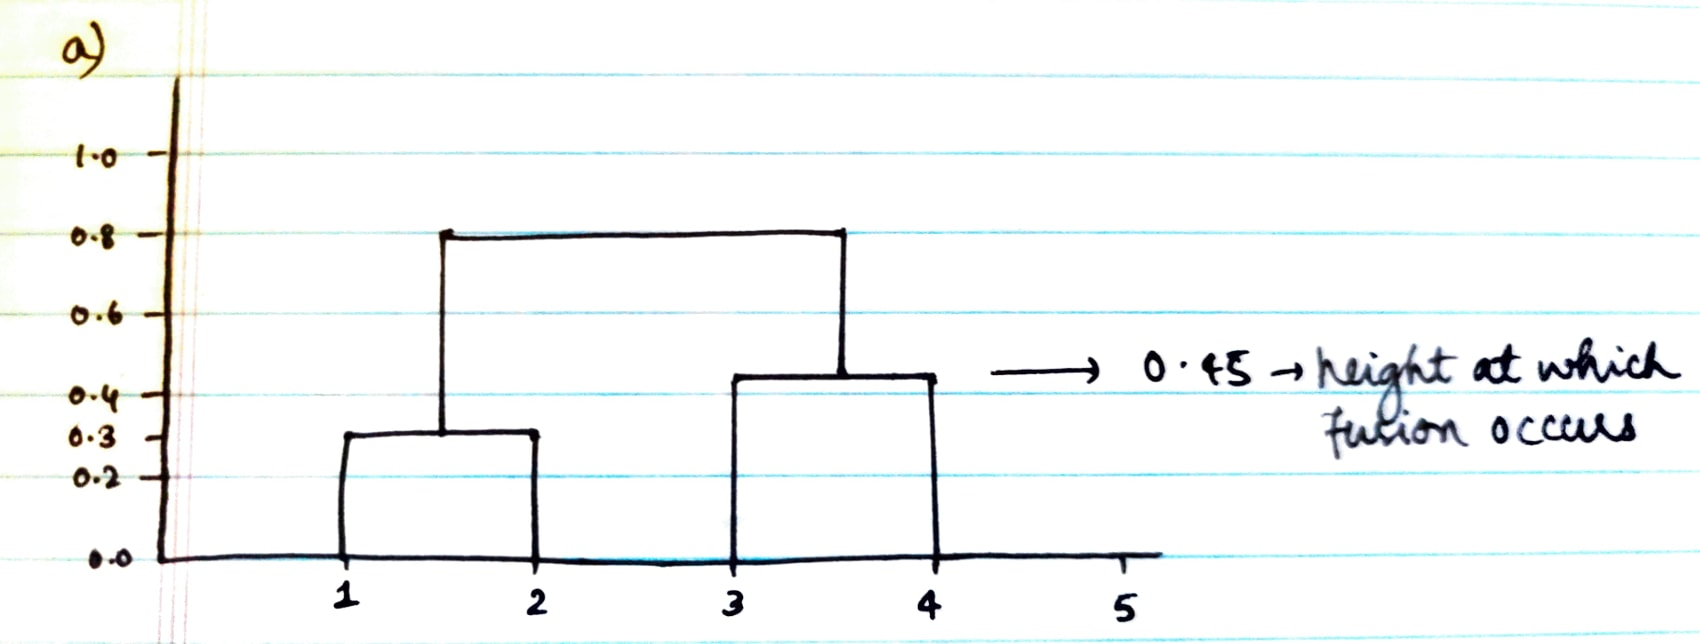

### (b) Repeat (a), this time using single linkage clustering.


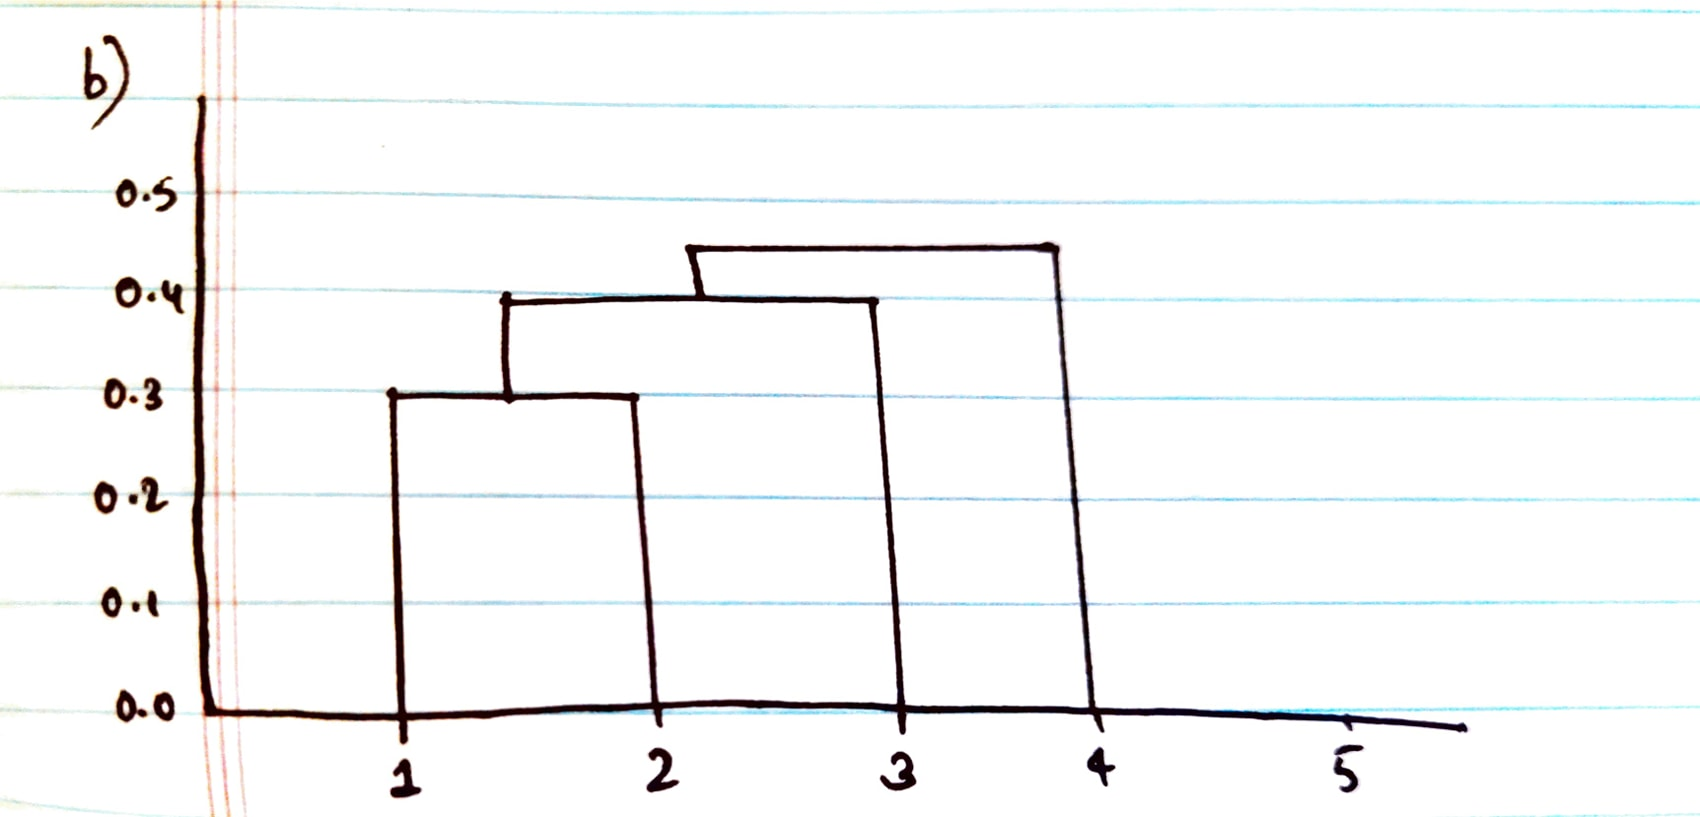

### (c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?


Cluster A:  1 and 2  
Cluster B:  3 and 4 

### (d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?

Cluster A : 1, 2 and 3 <br>
Cluster B : 4

### (e) It is mentioned in the chapter that at each fusion in the den- drogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

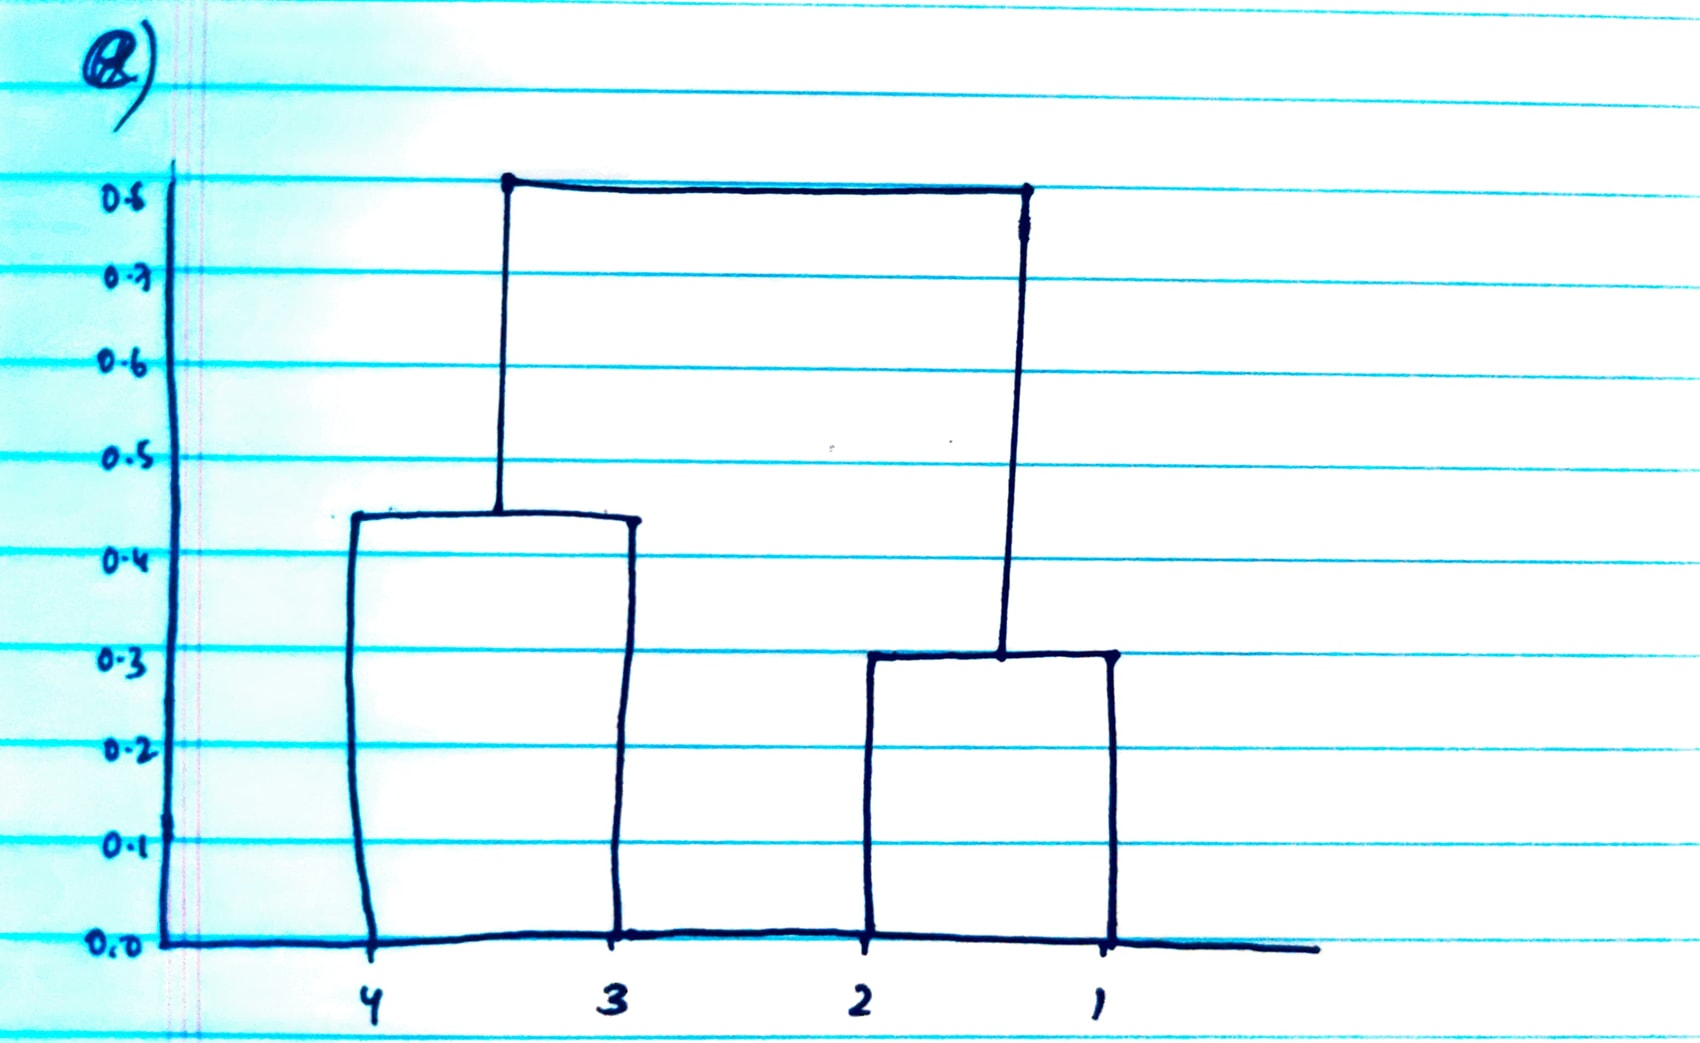

## References

https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff<br>https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics<br>https://towardsdatascience.com/k-means-clustering-and-the-gap-statistics-4c5d414acd29<br>https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder